In [14]:
import numpy as np
import matplotlib.pyplot as plt

from pybnn.bohamiann import Bohamiann

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

In [2]:
def f(x):
    return np.sinc(x * 10 - 5)

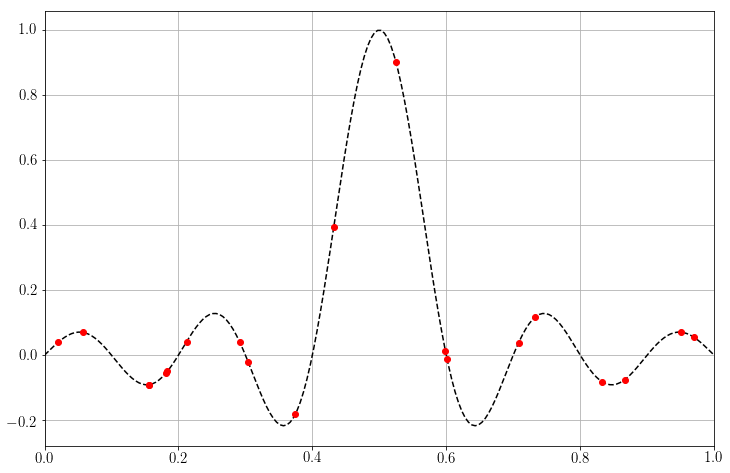

In [15]:
rng = np.random.RandomState(42)

x = rng.rand(20)
y = f(x)

grid = np.linspace(0, 1, 200)
fvals = f(grid)

plt.plot(grid, fvals, "k--")
plt.plot(x, y, "ro")
plt.grid()
plt.xlim(0, 1)

plt.show()

In [ ]:
model = Bohamiann()
model.train(x[:, None], y, num_steps=15000, num_burn_in_steps=10000, keep_every=100, lr=1e-3, verbose=True)

Step        0 : NLL =  5.0587e+02 MSE = 1.0192e+00 Time =  0.01
Step      512 : NLL =  4.0611e+02 MSE = 8.3488e-01 Time =  0.85
Step     1024 : NLL =  3.4502e+02 MSE = 7.1822e-01 Time =  1.69
Step     1536 : NLL =  2.8006e+02 MSE = 5.8986e-01 Time =  2.53
Step     2048 : NLL =  2.1033e+02 MSE = 4.5005e-01 Time =  3.48
Step     2560 : NLL =  1.5337e+02 MSE = 3.3454e-01 Time =  4.41
Step     3072 : NLL =  1.1264e+02 MSE = 2.4985e-01 Time =  5.34
Step     3584 : NLL =  7.8326e+01 MSE = 1.7795e-01 Time =  6.23
Step     4096 : NLL =  5.6585e+01 MSE = 1.3360e-01 Time =  7.12
Step     4608 : NLL =  4.4301e+01 MSE = 1.0750e-01 Time =  8.02
Step     5120 : NLL =  3.6043e+01 MSE = 8.9067e-02 Time =  9.03
Step     5632 : NLL =  3.2827e+01 MSE = 8.1895e-02 Time =  9.91
Step     6144 : NLL =  3.0653e+01 MSE = 7.7365e-02 Time = 10.80
Step     6656 : NLL =  2.8577e+01 MSE = 7.3553e-02 Time = 11.68
Step     7168 : NLL =  2.8485e+01 MSE = 7.4894e-02 Time = 12.54
Step     7680 : NLL =  2.5719e+01 MSE = 

In [11]:
model.predict(x[0, None, None])

(array([-0.16790833], dtype=float32), array([0.00070217], dtype=float32))

(99, 200)


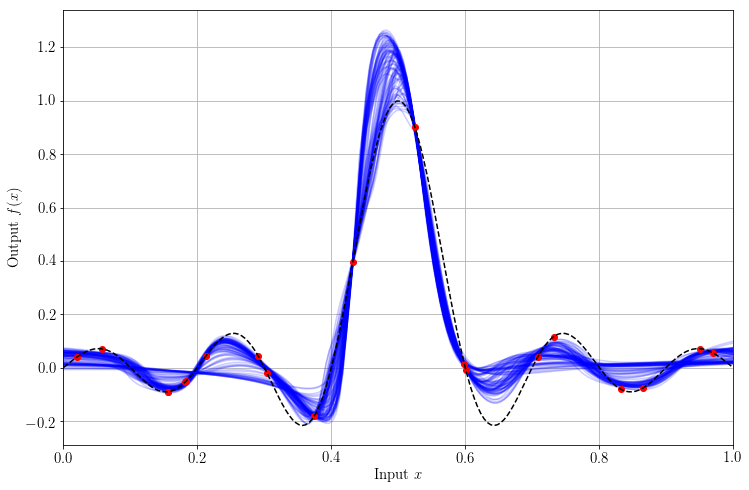

In [16]:
m, v, samples = model.predict(grid[:, None], return_individual_predictions=True)

print(samples.shape)
for sample in samples:
    plt.plot(grid, sample, "blue", alpha=0.2)

plt.plot(x, y, "ro")
plt.grid(True)
plt.plot(grid, fvals, "k--")

plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()

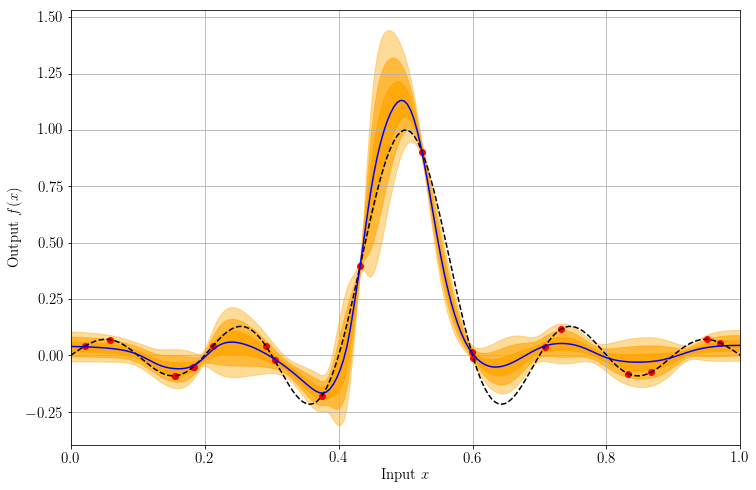

In [17]:
m, v = model.predict(grid[:, None])

plt.plot(x, y, "ro")
plt.grid()
plt.plot(grid, fvals, "k--")
plt.plot(grid, m, "blue")
plt.fill_between(grid, m + np.sqrt(v), m - np.sqrt(v), color="orange", alpha=0.8)
plt.fill_between(grid, m + 2 * np.sqrt(v), m - 2 * np.sqrt(v), color="orange", alpha=0.6)
plt.fill_between(grid, m + 3 * np.sqrt(v), m - 3 * np.sqrt(v), color="orange", alpha=0.4)
plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()